\newpage

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Benchmark – Strategic Alliances**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Nidhi A. Yete

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Master of Sciences, Grand Canyon University

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DSC-580: Designing and Creating Data Products

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Dr. Michele Bennett

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;January 31, 2024.

\newpage

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Data Product: Analytics Pipeline**


In [89]:
# mount google drive
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from scipy.stats.mstats import winsorize
from scipy.stats import mstats
import scipy.stats as stats
import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
# read dataset
crop = pd.read_csv('C:\\Nidhi\\crop\\crop_yield.csv')

# View dataset
crop.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
# check structure
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [5]:
# descriptive analysis
crop.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Crop,19689,55,Rice,1197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crop_Year,19689.0,NaN,NaN,NaN,2009.127584,6.498099,1997.0,2004.0,2010.0,2015.0,2020.0
Season,19689,6,Kharif,8232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,19689,30,Karnataka,1432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,19689.0,NaN,NaN,NaN,179926.570308,732828.675888,0.5,1390.0,9317.0,75112.0,50808100.0
Production,19689.0,NaN,NaN,NaN,16435941.273097,263056839.812568,0.0,1393.0,13804.0,122718.0,6326000000.0
Annual_Rainfall,19689.0,NaN,NaN,NaN,1437.755177,816.909589,301.3,940.7,1247.6,1643.7,6552.7
Fertilizer,19689.0,NaN,NaN,NaN,24103312.448806,94946004.482527,54.17,188014.62,1234957.44,10003847.2,4835406877.0
Pesticide,19689.0,NaN,NaN,NaN,48848.353392,213287.35486,0.09,356.7,2421.9,20041.7,15750511.0
Yield,19689.0,NaN,NaN,NaN,79.954009,878.306193,0.0,0.6,1.03,2.388889,21105.0


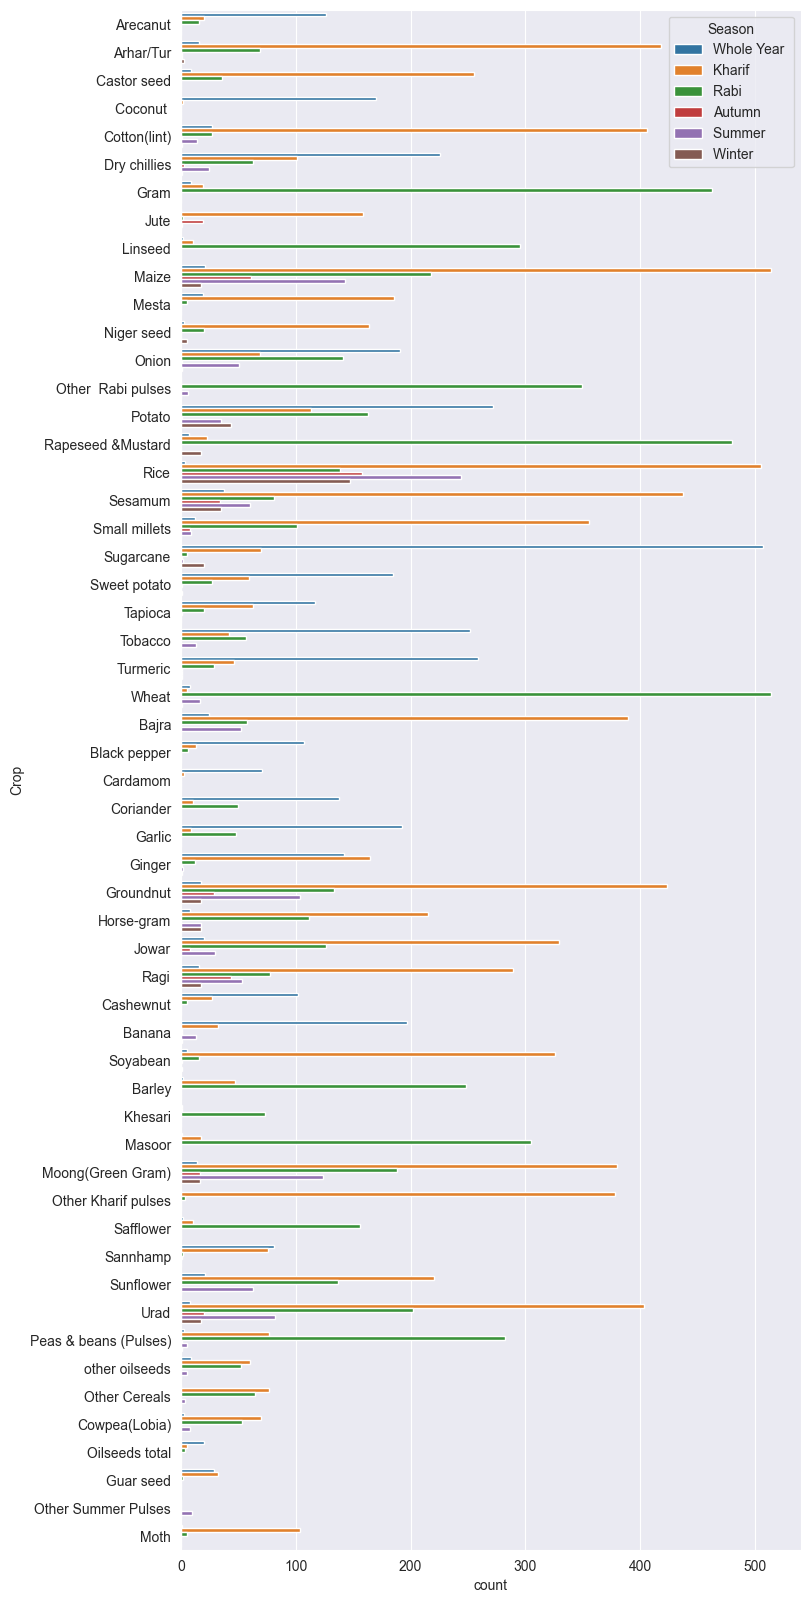

In [6]:
# Set the size of the plot
plt.figure(figsize=(8, 20))

# countplot
sns.countplot(crop, y='Crop', hue = 'Season')

# show plot
plt.show()

<AxesSubplot: xlabel='Season', ylabel='count'>

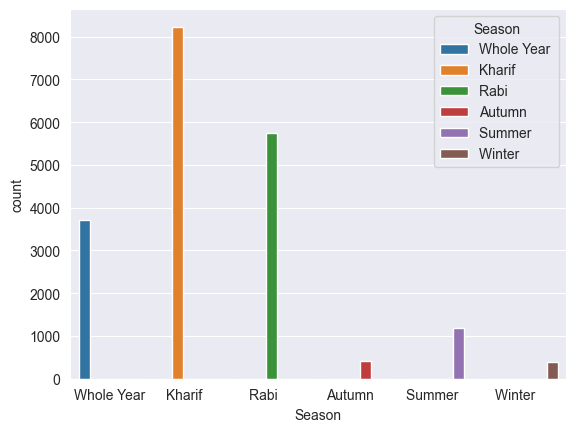

In [7]:
# countplot for season feature
sns.countplot(crop, x='Season', hue = 'Season')

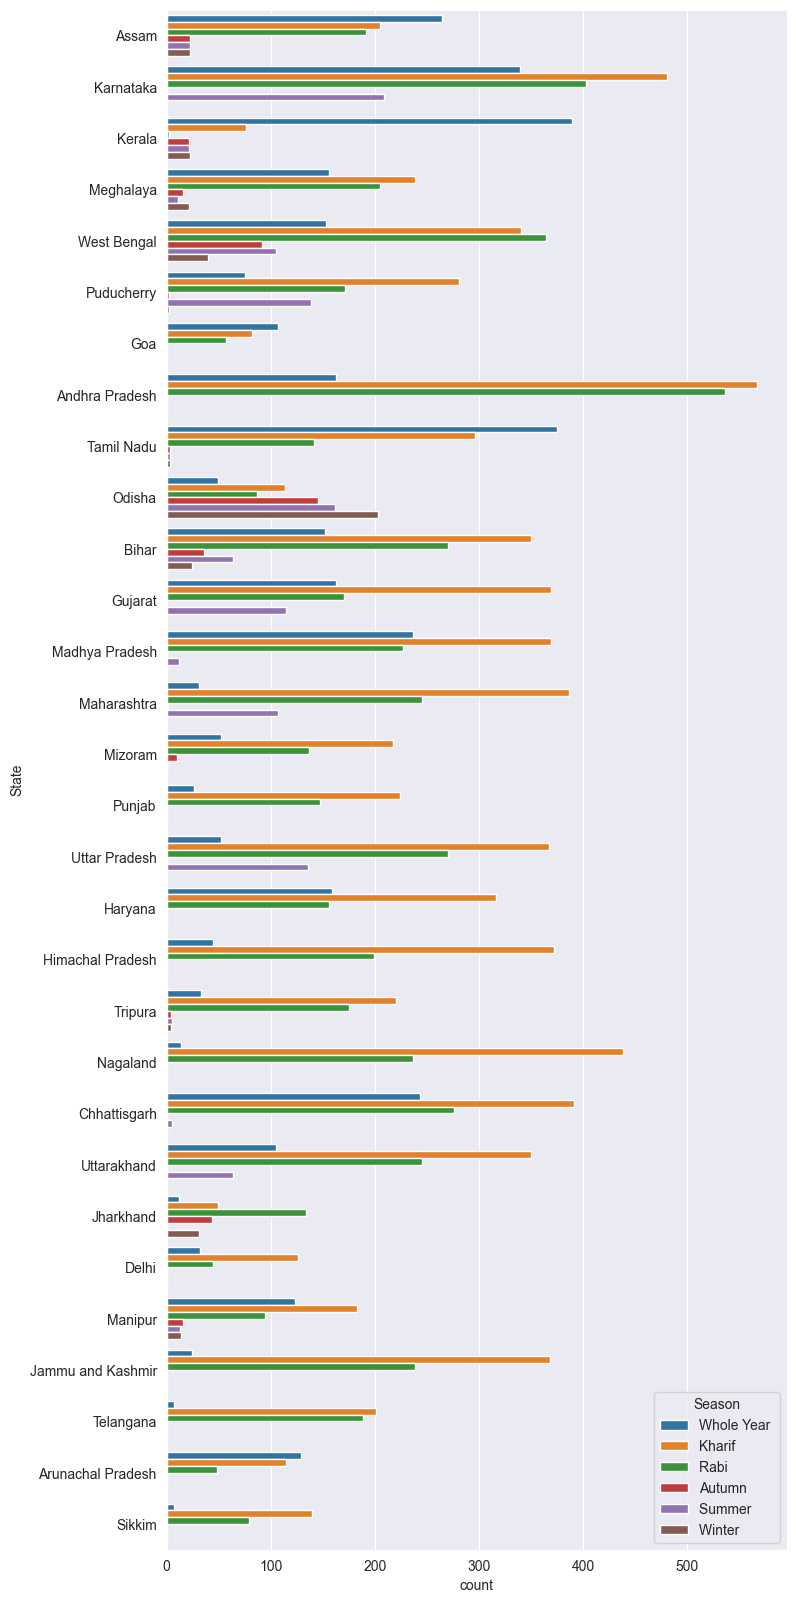

In [8]:
# Set the size of the plot
plt.figure(figsize=(8, 20))

# countplot
sns.countplot(crop, y='State', hue = 'Season')

# show plot
plt.show()

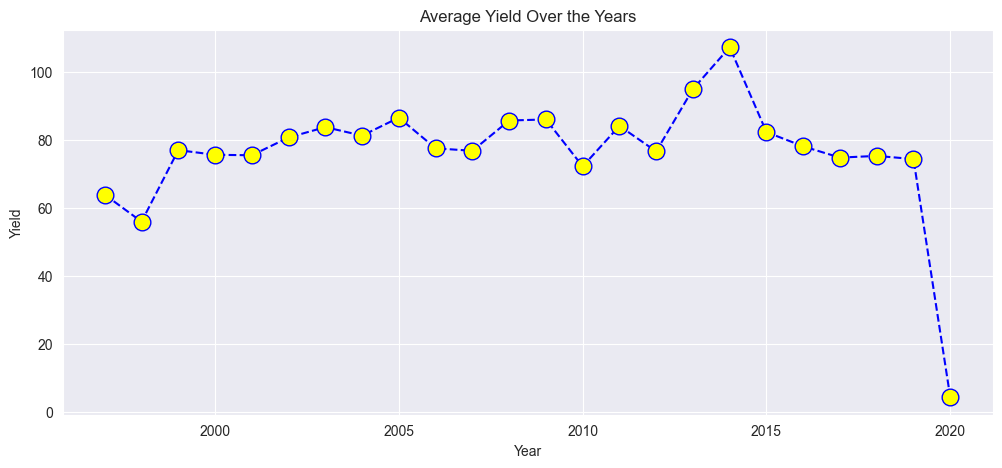

In [9]:
# Group by Crop_Year and calculate the mean yield for each year
yearly_yield = crop.groupby('Crop_Year').mean().reset_index()

# Set the size of the plot
plt.figure(figsize=(12, 5))

# Plotting
plt.plot(yearly_yield['Crop_Year'], yearly_yield['Yield'], color='blue', linestyle='dashed', marker='o',
         markersize=12, markerfacecolor='yellow')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Average Yield Over the Years')

# Show the plot
plt.show()

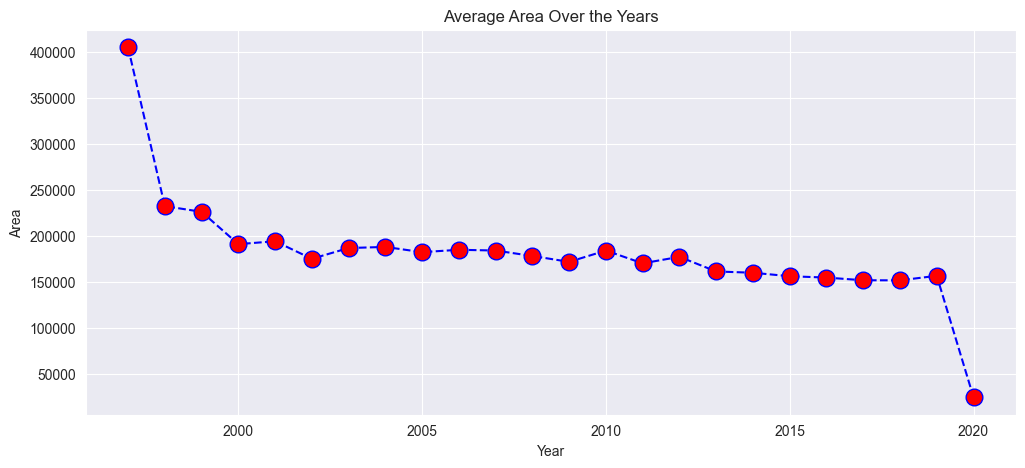

In [10]:
# Set the size of the plot
plt.figure(figsize=(12, 5))

# Plotting
plt.plot(yearly_yield['Crop_Year'], yearly_yield['Area'], color='blue', linestyle='dashed', marker='o',
         markersize=12, markerfacecolor='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Average Area Over the Years')

# Show the plot
plt.show()

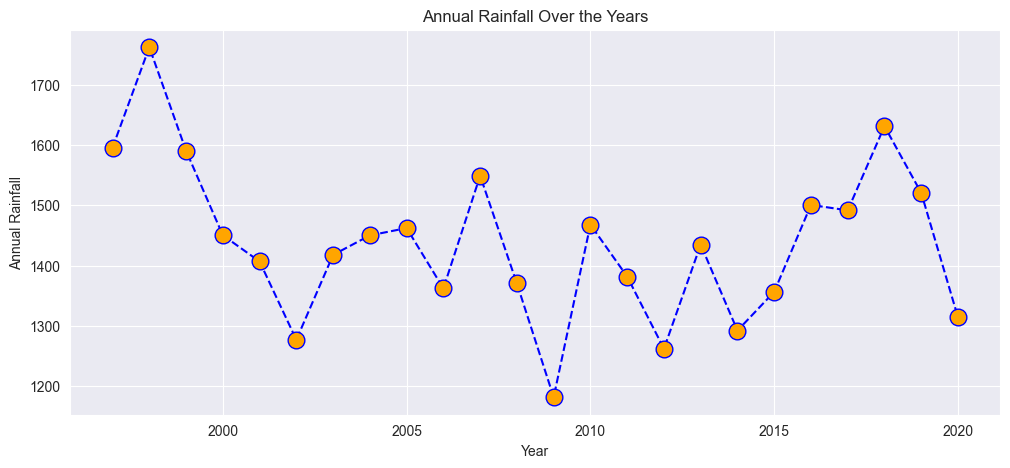

In [11]:
# Set the size of the plot
plt.figure(figsize=(12, 5))

# Plotting
plt.plot(yearly_yield['Crop_Year'], yearly_yield['Annual_Rainfall'], color='blue', linestyle='dashed', marker='o',
         markersize=12, markerfacecolor='orange')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Annual Rainfall')
plt.title('Annual Rainfall Over the Years')

# Show the plot
plt.show()

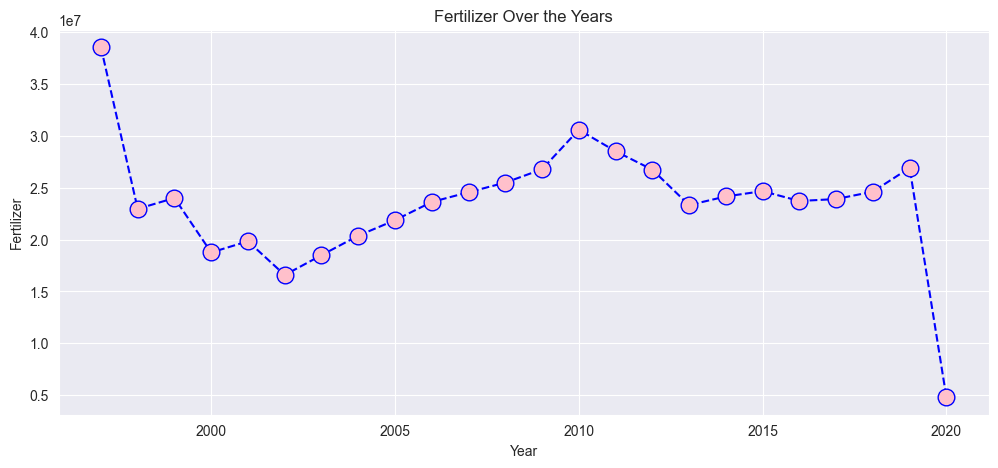

In [12]:
# Set the size of the plot
plt.figure(figsize=(12, 5))

# Plotting
plt.plot(yearly_yield['Crop_Year'], yearly_yield['Fertilizer'], color='blue', linestyle='dashed', marker='o',
         markersize=12, markerfacecolor='pink')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Fertilizer Over the Years')

# Show the plot
plt.show()

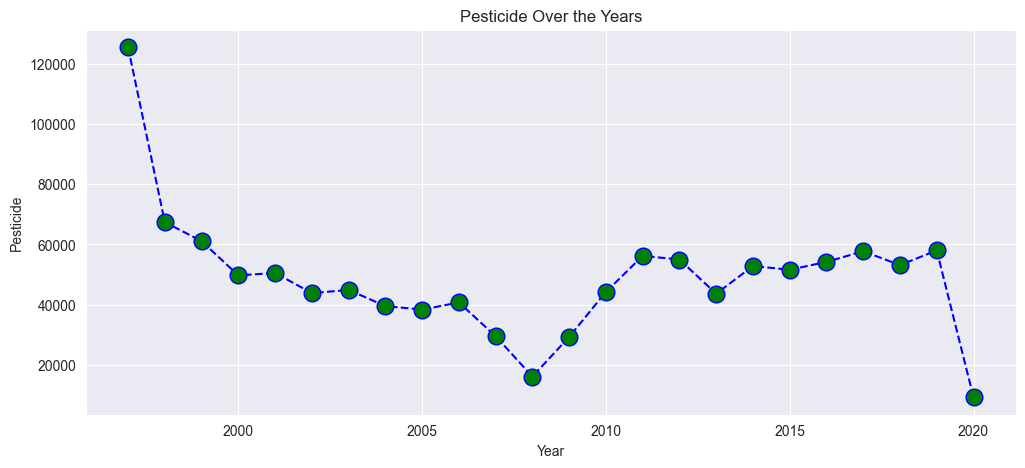

In [13]:
# Set the size of the plot
plt.figure(figsize=(12, 5))

# Plotting
plt.plot(yearly_yield['Crop_Year'], yearly_yield['Pesticide'], color='blue', linestyle='dashed', marker='o',
         markersize=12, markerfacecolor='green')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Pesticide Over the Years')

# Show the plot
plt.show()

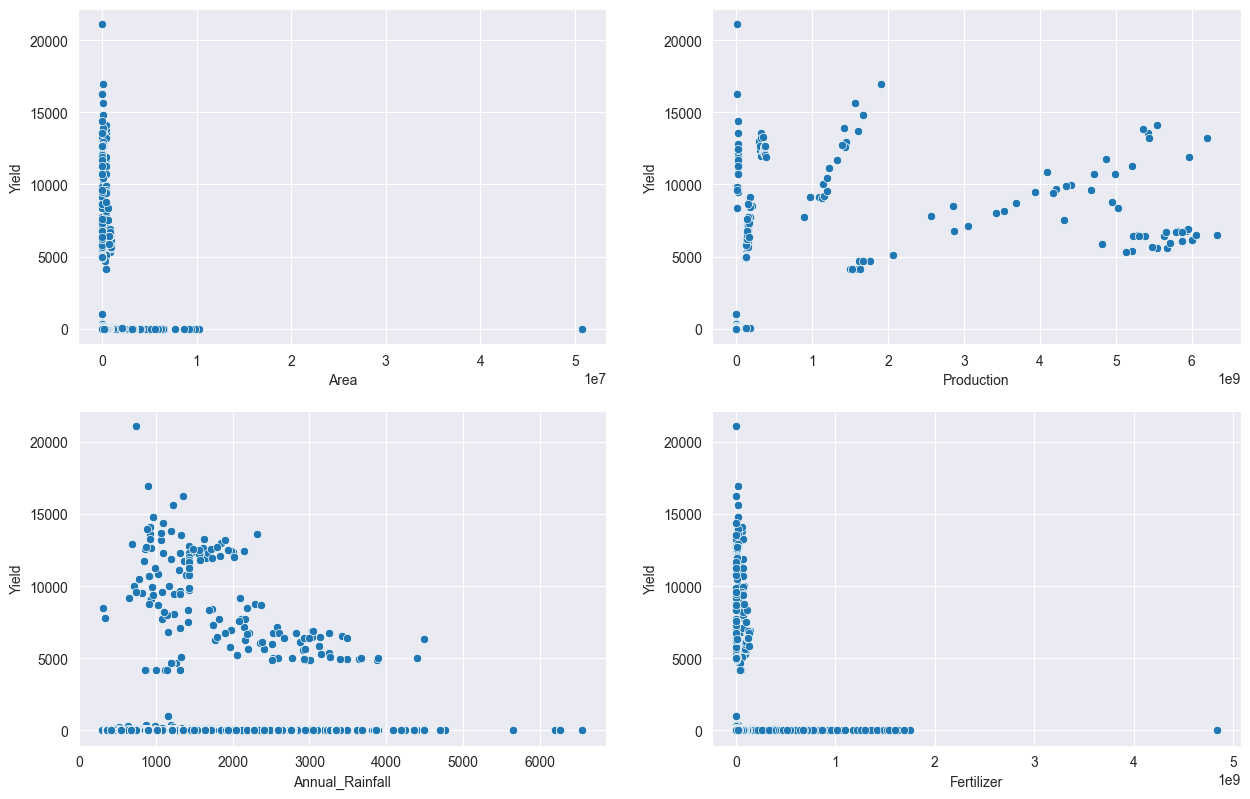

In [14]:
# Scatterplot plot of the dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.scatterplot(data=crop, x='Area', y='Yield')
plt.subplot(4,2,2)
sns.scatterplot(data=crop, x='Production', y='Yield')
plt.subplot(4,2,3)
sns.scatterplot(data=crop, x='Annual_Rainfall', y='Yield')
plt.subplot(4,2,4)
sns.scatterplot(data=crop, x='Fertilizer', y='Yield')
plt.show()

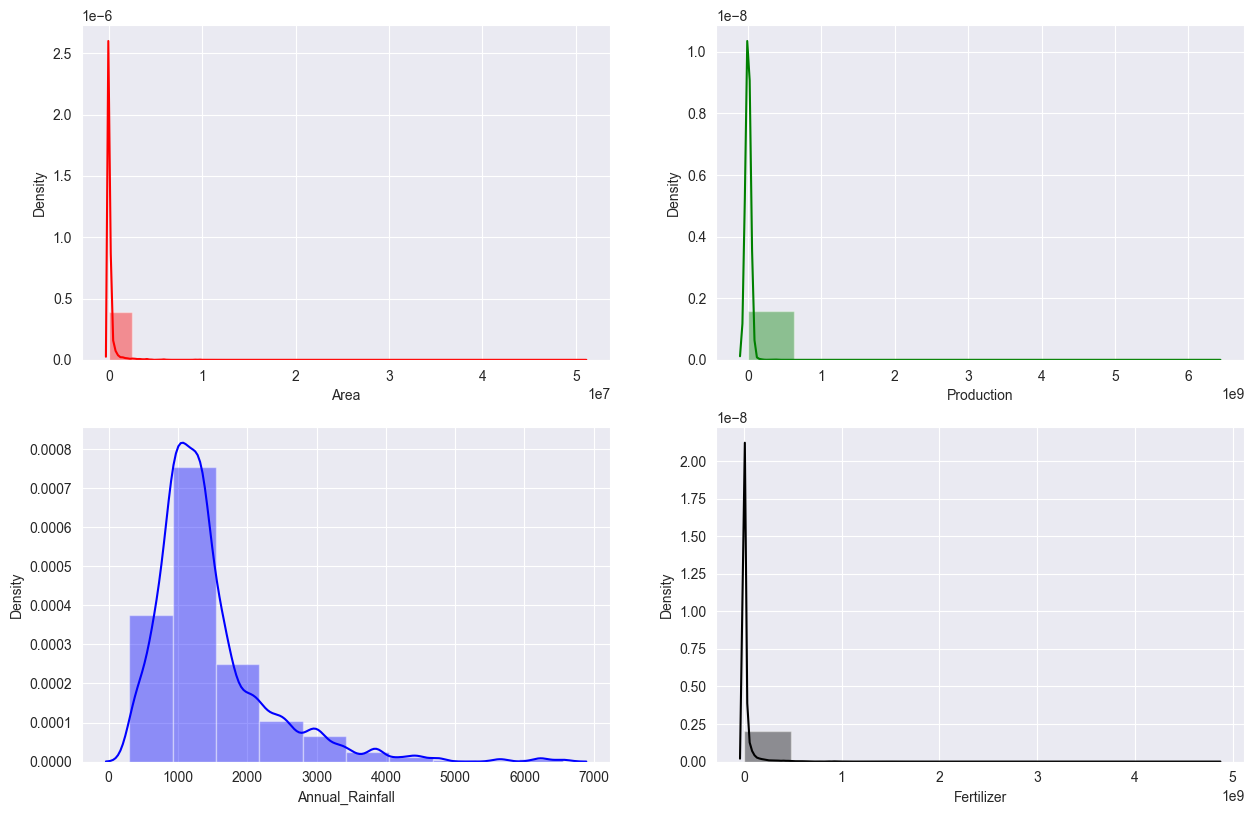

In [15]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(crop['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(crop['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(crop['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(crop['Fertilizer'],bins = 10, color = 'black')
plt.show()

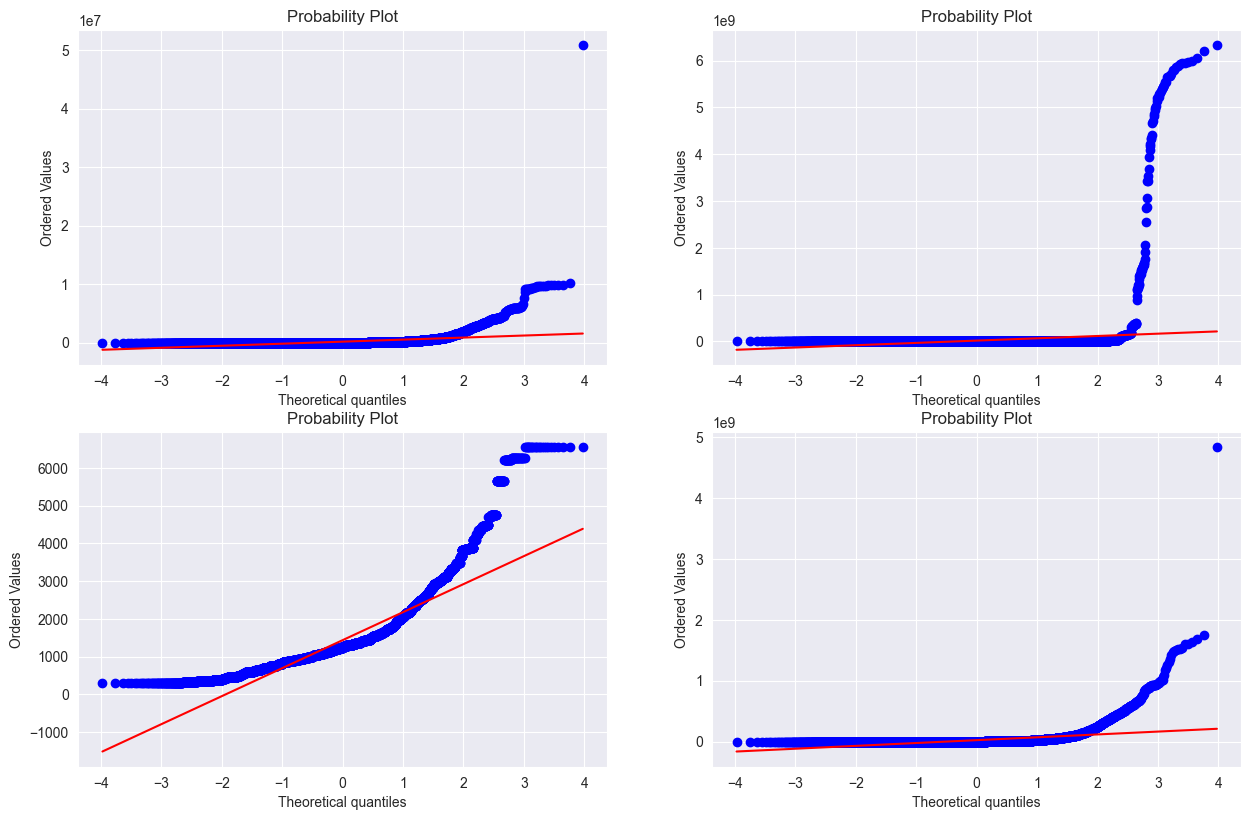

In [16]:
# Q-Q plot of the dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(crop['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(crop['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(crop['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(crop['Fertilizer'], dist = 'norm', plot = plt)
plt.show()


In [17]:
# check missing values
crop.isna().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [18]:
# check null values
crop.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [19]:
# check duplicates
crop.duplicated().sum()

0

In [20]:
# copy dataset
crop_out = crop.copy()

<AxesSubplot: >

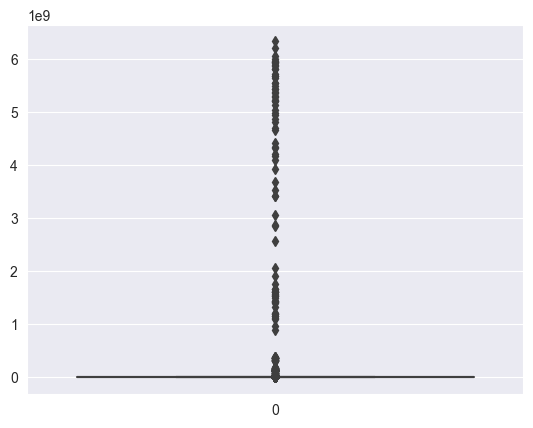

In [21]:
# check outliers
sns.boxplot(crop_out.Production)

<AxesSubplot: >

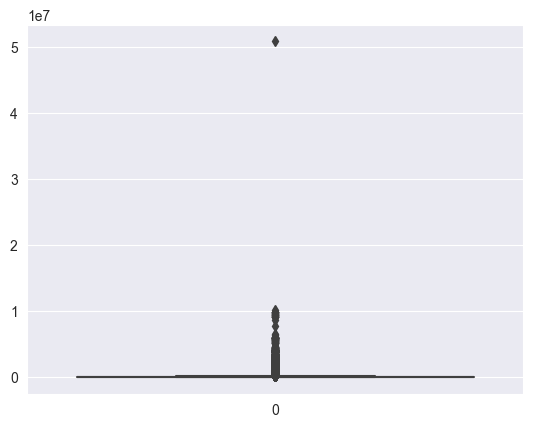

In [22]:
# check outliers
sns.boxplot(crop_out.Area)

In [23]:
crop_out['Area'] = winsorize(crop_out['Area'], limits= [0.01,0.01])

<AxesSubplot: >

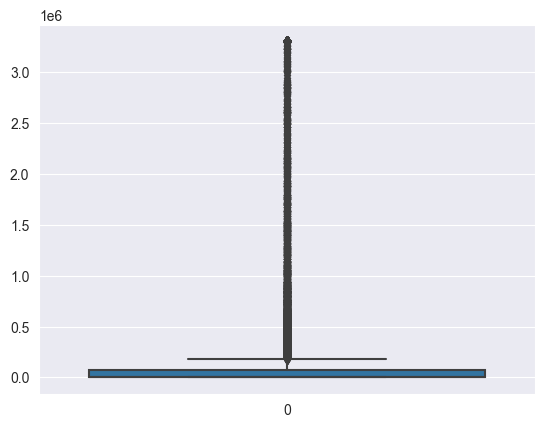

In [24]:
# check outliers
sns.boxplot(crop_out.Area)

<AxesSubplot: >

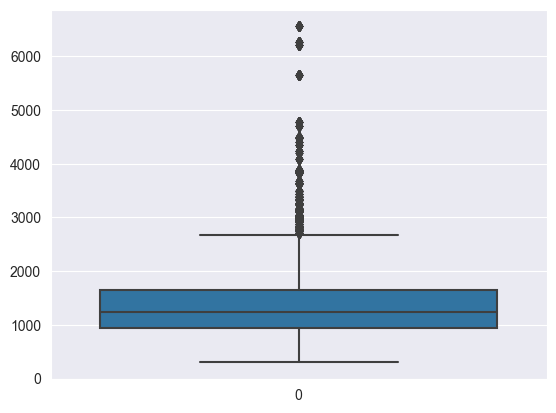

In [25]:
# check outliers
sns.boxplot(crop_out.Annual_Rainfall)

<AxesSubplot: >

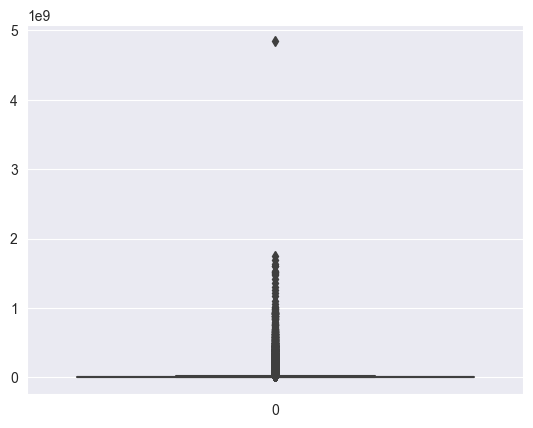

In [26]:
# check outliers
sns.boxplot(crop_out.Fertilizer)

In [27]:
crop_out['Fertilizer'] = winsorize(crop_out['Fertilizer'], limits= [0.01,0.01])

<AxesSubplot: >

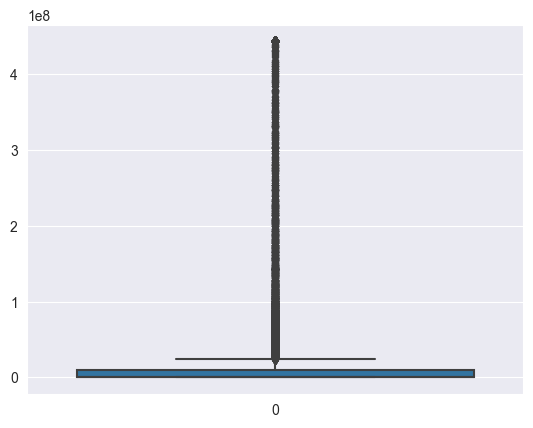

In [28]:
# check outliers
sns.boxplot(crop_out.Fertilizer)

<AxesSubplot: >

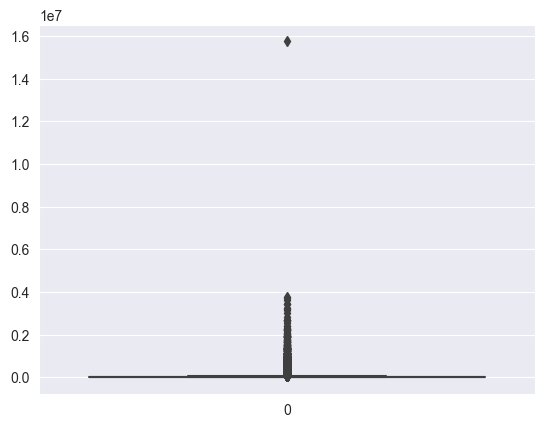

In [29]:
# check outliers
sns.boxplot(crop.Pesticide)

In [30]:
crop_out['Pesticide'] = winsorize(crop_out['Pesticide'], limits= [0.01,0.01])

<AxesSubplot: >

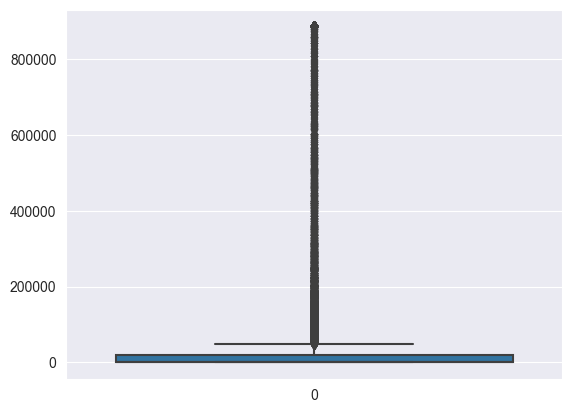

In [31]:
# check outliers
sns.boxplot(crop_out.Pesticide)

<AxesSubplot: >

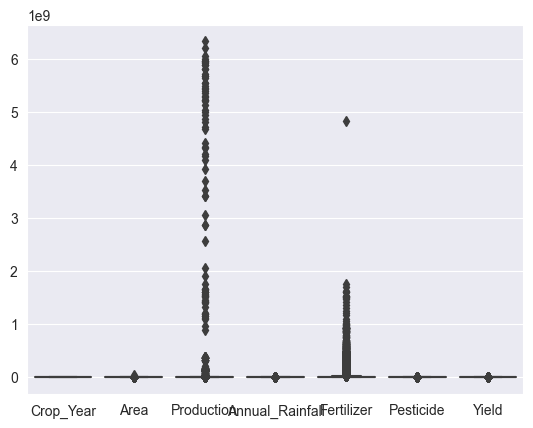

In [32]:
# boxplot
sns.boxplot(crop)

<AxesSubplot: >

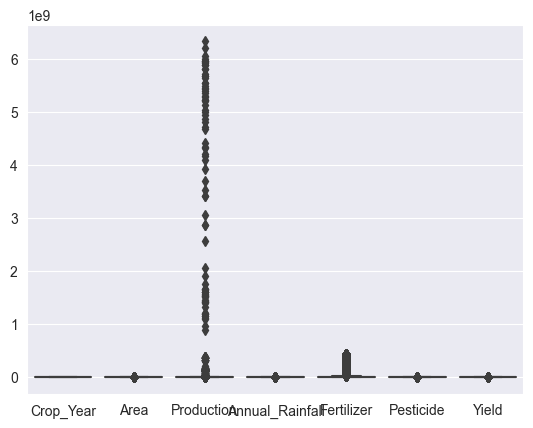

In [33]:
# boxplot
sns.boxplot(crop_out)

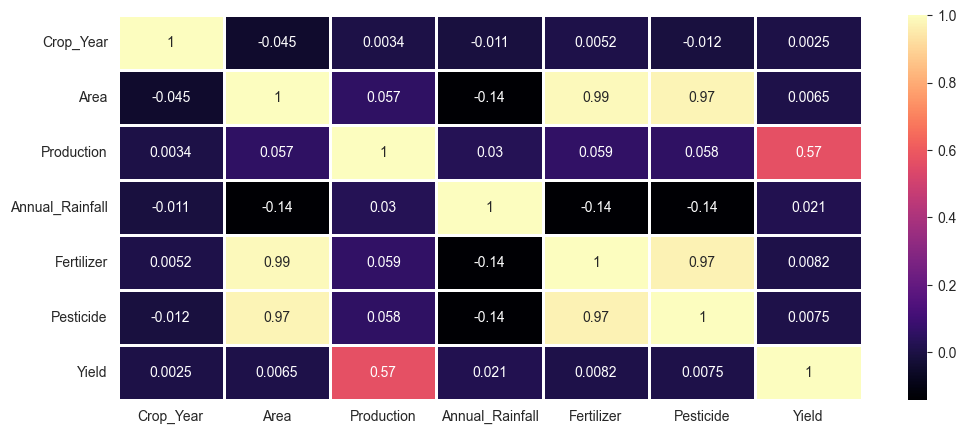

In [34]:
# Calculate the correlation coefficients
plt.figure(figsize = [12, 5], facecolor = 'white')
sns.heatmap(crop_out.corr(), annot = True, linewidths = 2, cmap = "magma");

In [141]:
# copy dataset
crop_df = crop_out.copy()
crop_df = crop_df.drop(['Crop_Year','Pesticide'], axis = 1)
crop_df.head()

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Yield
0,Arecanut,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,0.796087
1,Arhar/Tur,Kharif,Assam,6637.0,4685,2051.4,631643.29,0.710435
2,Castor seed,Kharif,Assam,796.0,22,2051.4,75755.32,0.238333
3,Coconut,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,5238.051739
4,Cotton(lint),Kharif,Assam,1739.0,794,2051.4,165500.63,0.420909


In [142]:
# creating instances
ohe =  OneHotEncoder(drop='first', sparse=False)
scaler = PowerTransformer(method = 'yeo-johnson')

In [143]:
categorical = crop_df.select_dtypes(exclude='number').columns
numerical = crop_df.select_dtypes('number').columns

In [145]:
crop_df = pd.get_dummies(crop_df, columns = categorical, drop_first=True)
crop_df.head

<bound method NDFrame.head of            Area  Production  Annual_Rainfall   Fertilizer        Yield  \
0       73814.0       56708           2051.4   7024878.38     0.796087   
1        6637.0        4685           2051.4    631643.29     0.710435   
2         796.0          22           2051.4     75755.32     0.238333   
3       19656.0   126905000           2051.4   1870661.52  5238.051739   
4        1739.0         794           2051.4    165500.63     0.420909   
...         ...         ...              ...          ...          ...   
19684    4000.0        2000           1498.0    395200.00     0.500000   
19685    1000.0        3000           1498.0     98800.00     3.000000   
19686  310883.0      440900           1356.2  29586735.11     1.285000   
19687  275746.0        5488           1356.2  26242746.82     0.016667   
19688  239344.0      392160           1356.2  22778368.48     1.261818   

       Crop_Arhar/Tur  Crop_Bajra  Crop_Banana  Crop_Barley  \
0                 

In [146]:
# Splitting data into features (X) and target variable (y)
X = crop_df.drop('Yield', axis=1)
y = crop_df['Yield']


In [147]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123)

In [148]:
# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (15751, 92)
X_test shape: (3938, 92)
y_train shape: (15751,)
y_test shape: (3938,)


In [149]:
# Fit the scaler on the training set and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames and assign column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

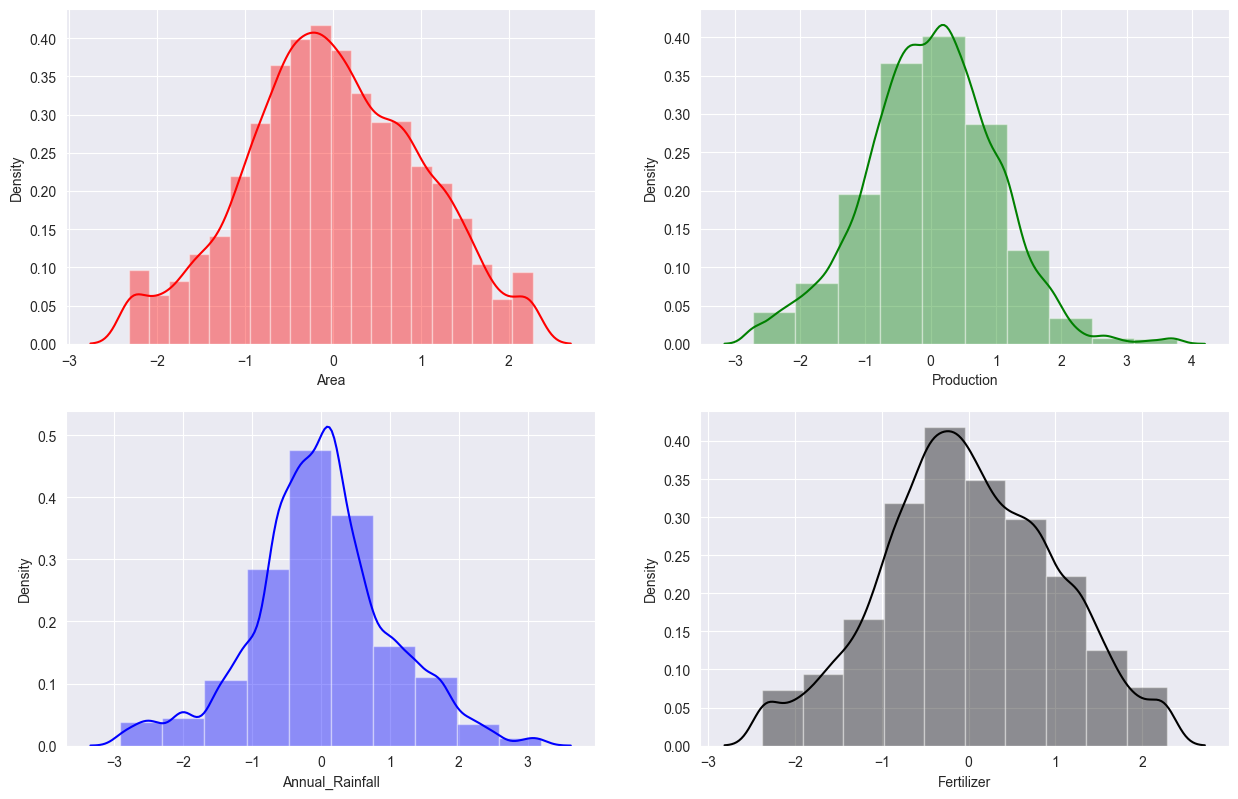

In [150]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(X_train_scaled_df['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(X_train_scaled_df['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(X_train_scaled_df['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(X_train_scaled_df['Fertilizer'],bins = 10, color = 'black')
plt.show()

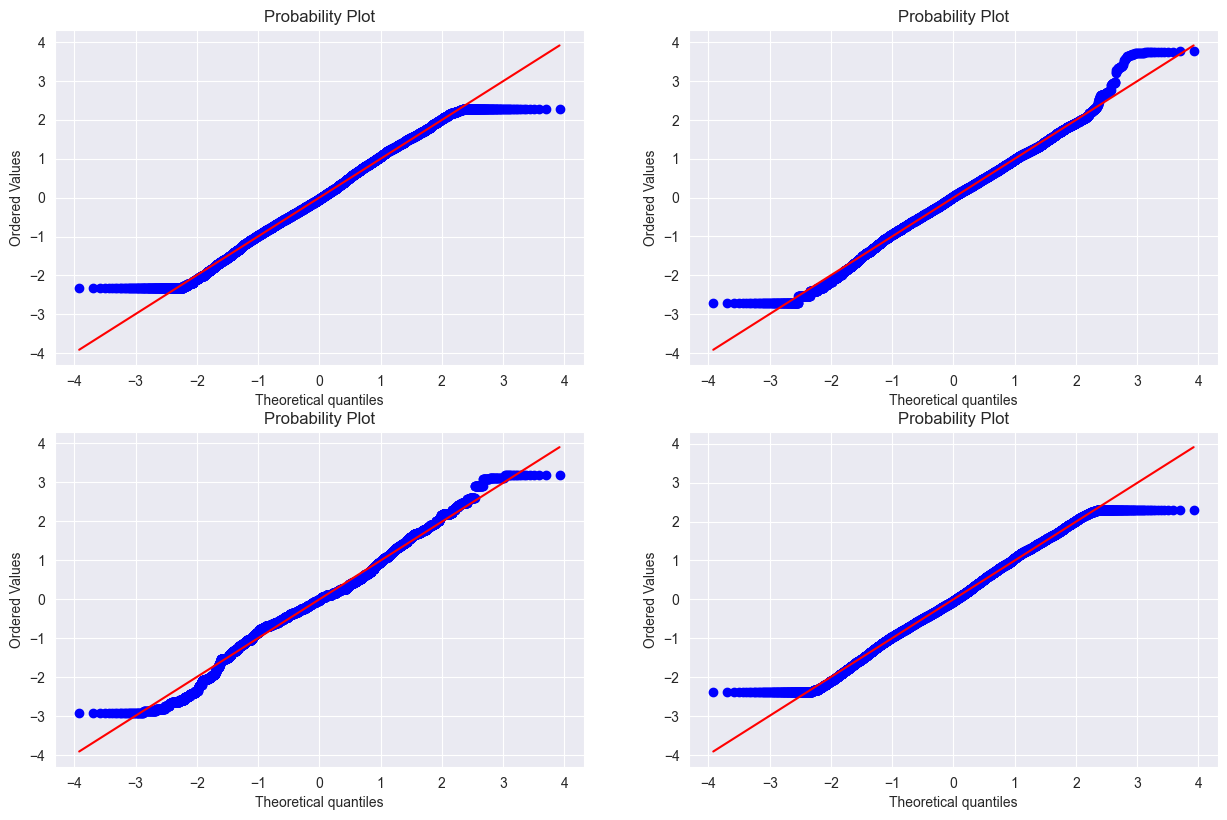

In [151]:
# Q-Q plot of the dataset

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(X_train_scaled_df['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(X_train_scaled_df['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(X_train_scaled_df['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(X_train_scaled_df['Fertilizer'], dist = 'norm', plot = plt)
plt.show()

In [95]:
# create pipeline object
#pipe = Pipeline(steps=[
   # ('ohe', OneHotEncoder()),
   #('scaler', RobustScaler(with_centering=False)),
   # ('random_forest_regression', RandomForestRegressor())
#])

**Linear Regression**

In [153]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled_df, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test_scaled_df)

In [154]:
linear_reg_predictions.shape


(3938,)

In [155]:
# Evaluate models
linear_reg_rmse = mean_squared_error(y_test,
                                     linear_reg_predictions, squared=False)

# Calculate R²
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

In [156]:
# Print the results
print(f'Linear Regression RMSE: {linear_reg_rmse}')
print(f'Linear Regression R²: {linear_reg_r2}')

Linear Regression RMSE: 359.7978300063717
Linear Regression R²: 0.8526655213570473


In [73]:
# cross validation
linear_reg_cv_scores = cross_val_score(linear_reg_model, X_train, y_train, cv=5)
print("Linear Regression Cross-Validation Scores:", linear_reg_cv_scores)

Linear Regression Cross-Validation Scores: [0.91350385 0.92529021 0.92390101 0.91666759 0.91515097]


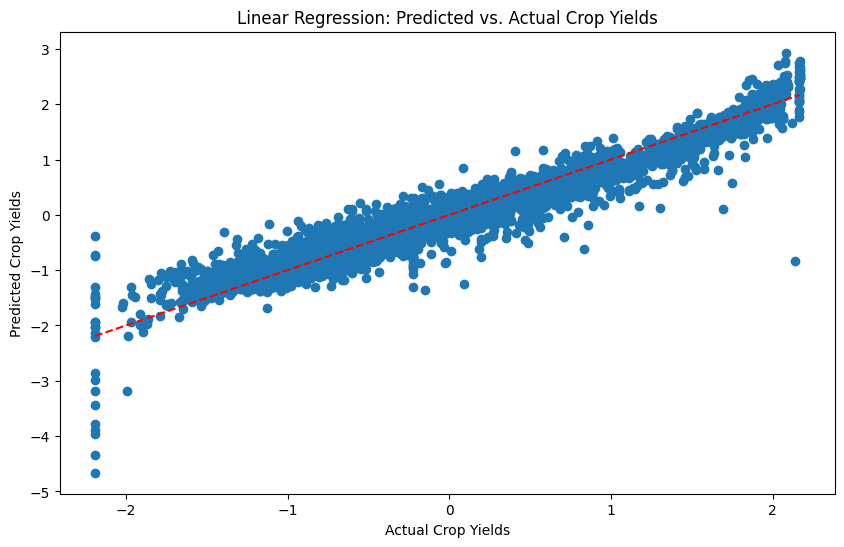

In [111]:
# Scatterplot of predicted vs. actual crop yields
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_reg_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line for reference
plt.xlabel('Actual Crop Yields')
plt.ylabel('Predicted Crop Yields')
plt.title('Linear Regression: Predicted vs. Actual Crop Yields')
plt.show()

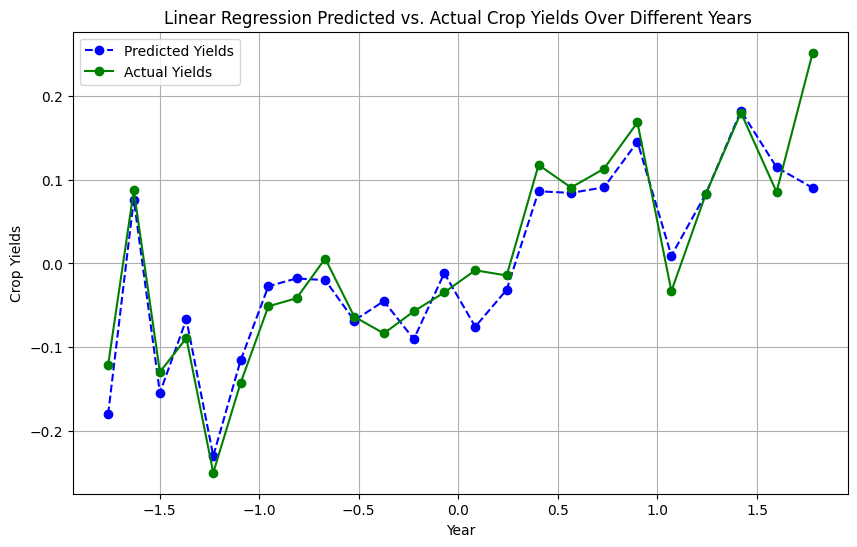

In [210]:
# Create a DataFrame with actual and predicted values
results_lr = pd.DataFrame({'Actual': y_test, 'Predicted': linear_reg_predictions, 'Year': X_test['Crop_Year']})

# Group by year and calculate the mean values
grouped_results_lr = results_lr.groupby('Year').mean().reset_index()

# Line chart for predicted vs. actual crop yields over different years (grouped by year)
plt.figure(figsize=(10, 6))
plt.plot(grouped_results_lr['Year'], grouped_results_lr['Predicted'],
         label='Predicted Yields', linestyle='--', marker='o', color='blue')
plt.plot(grouped_results_lr['Year'], grouped_results_lr['Actual'],
         label='Actual Yields', linestyle='-', marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Crop Yields')
plt.title('Linear Regression Predicted vs. Actual Crop Yields Over Different Years ')
plt.legend()
plt.grid(True)
plt.show()

**Random Forest Regressor**

In [157]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled_df, y_train)
rf_predictions = rf_model.predict(X_test_scaled_df)

In [121]:
# Evaluate models
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

# Calculate R²
rf_r2 = r2_score(y_test, rf_predictions)

In [122]:
# Print results
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest R²: {rf_r2}')

Random Forest RMSE: 277.93369330198897
Random Forest R²: 0.9120836380558364


In [74]:
#cross validation
random_forest_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Random Forest Cross-Validation Scores:", random_forest_cv_scores)


Random Forest Cross-Validation Scores: [0.97734164 0.97940676 0.97658215 0.97456945 0.97434894]


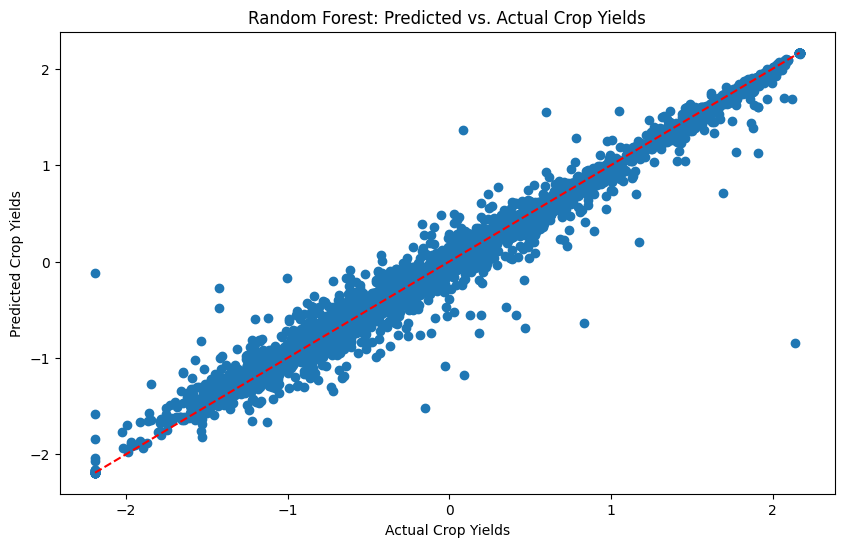

In [114]:
# Scatterplot of predicted vs. actual crop yields
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line for reference
plt.xlabel('Actual Crop Yields')
plt.ylabel('Predicted Crop Yields')
plt.title('Random Forest: Predicted vs. Actual Crop Yields')
plt.show()

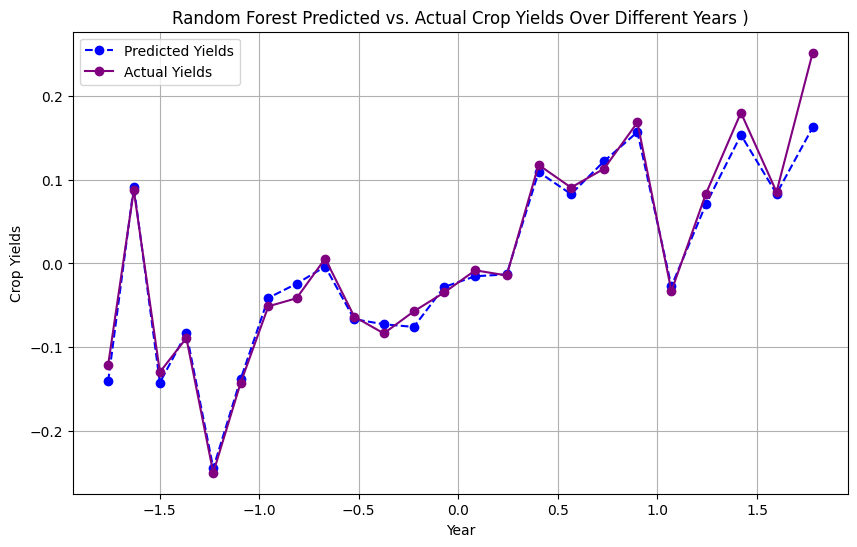

In [211]:
# Create a DataFrame with actual and predicted values
results_rf = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions, 'Year': X_test['Crop_Year']})

# Group by year and calculate the mean values
grouped_results_rf = results_rf.groupby('Year').mean().reset_index()

# Line chart for predicted vs. actual crop yields over different years (grouped by year)
plt.figure(figsize=(10, 6))
plt.plot(grouped_results_rf['Year'], grouped_results_rf['Predicted'],
         label='Predicted Yields', linestyle='--', marker='o', color='blue')
plt.plot(grouped_results_rf['Year'], grouped_results_rf['Actual'],
         label='Actual Yields', linestyle='-', marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Crop Yields')
plt.title('Random Forest Predicted vs. Actual Crop Yields Over Different Years )')
plt.legend()
plt.grid(True)
plt.show()

**Feature Importance**

In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_


In [ ]:
# Get the column names (feature names)
feature_names = X_train.columns

In [ ]:
# Create a DataFrame to store feature importance values
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})


In [ ]:
# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
2,Production,0.489330
1,Area,0.325413
63,Season_Whole Year,0.049472
4,Fertilizer,0.029999
42,Crop_Potato,0.028440
...,...,...
31,Crop_Mesta,0.000015
27,Crop_Khesari,0.000009
40,Crop_Other Summer Pulses,0.000008
8,Crop_Banana,0.000008


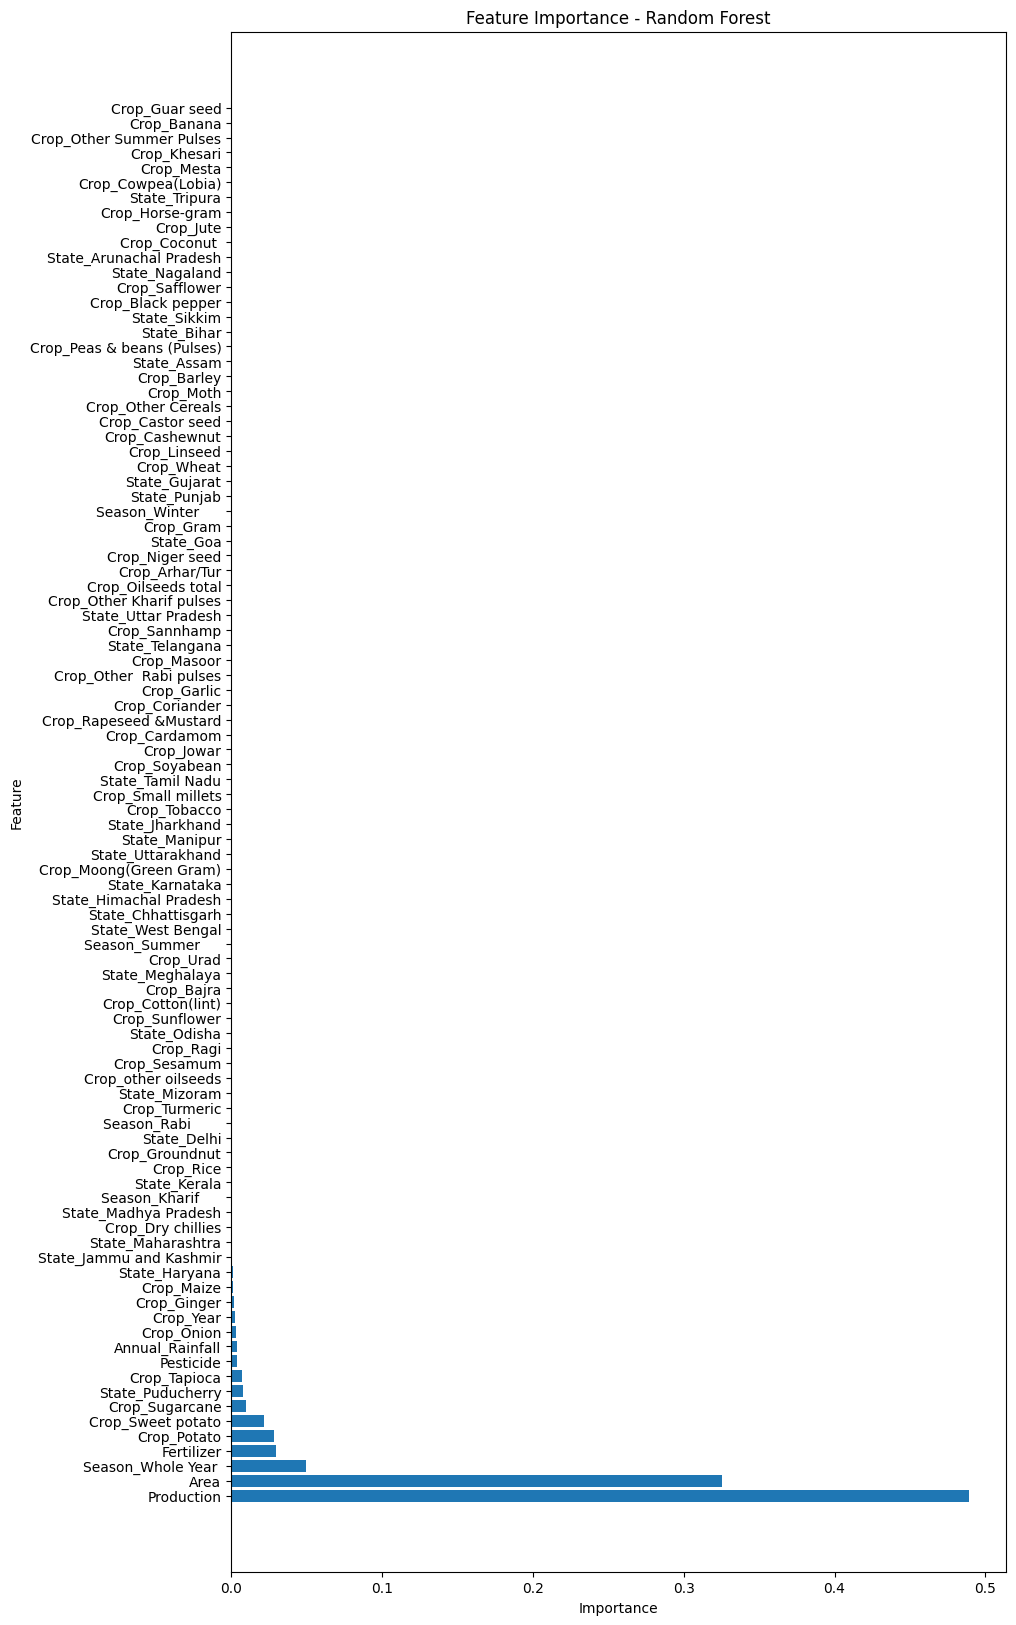

In [ ]:
# Plotting the feature importances
plt.figure(figsize=(10, 20))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()

**Long Short-Term Memory (LSTM)**

In [ ]:
# Reshape X_train for LSTM
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))

# Reshape X_test
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

In [ ]:
# Create LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
247/247 [==============================] - 8s 25ms/step - loss: 1.0018
Epoch 2/50
247/247 [==============================] - 7s 27ms/step - loss: 0.9597
Epoch 3/50
247/247 [==============================] - 6s 25ms/step - loss: 0.9427
Epoch 4/50
247/247 [==============================] - 7s 27ms/step - loss: 0.9277
Epoch 5/50
247/247 [==============================] - 8s 32ms/step - loss: 0.9118
Epoch 6/50
247/247 [==============================] - 6s 25ms/step - loss: 0.8967
Epoch 7/50
247/247 [==============================] - 7s 27ms/step - loss: 0.8800
Epoch 8/50
247/247 [==============================] - 6s 25ms/step - loss: 0.8542
Epoch 9/50
247/247 [==============================] - 7s 27ms/step - loss: 0.8151
Epoch 10/50
247/247 [==============================] - 6s 25ms/step - loss: 0.7185
Epoch 11/50
247/247 [==============================] - 7s 27ms/step - loss: 0.4766
Epoch 12/50
247/247 [==============================] - 6s 26ms/step - loss: 0.4337
Epoch 13/50
2

In [64]:
# Make predictions
lstm_predictions = model.predict(X_test_reshaped)

124/124 [==============================] - 1s 11ms/step


In [65]:
# Evaluate the model
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
lstm_r2 = r2_score(y_test, lstm_predictions)

In [208]:
# Print results
print(f"LSTM RMSE: {lstm_rmse}")
print(f"LSTM R²: {lstm_r2}")

LSTM RMSE: 0.23928646149316427
LSTM R²: 0.9413293306928465


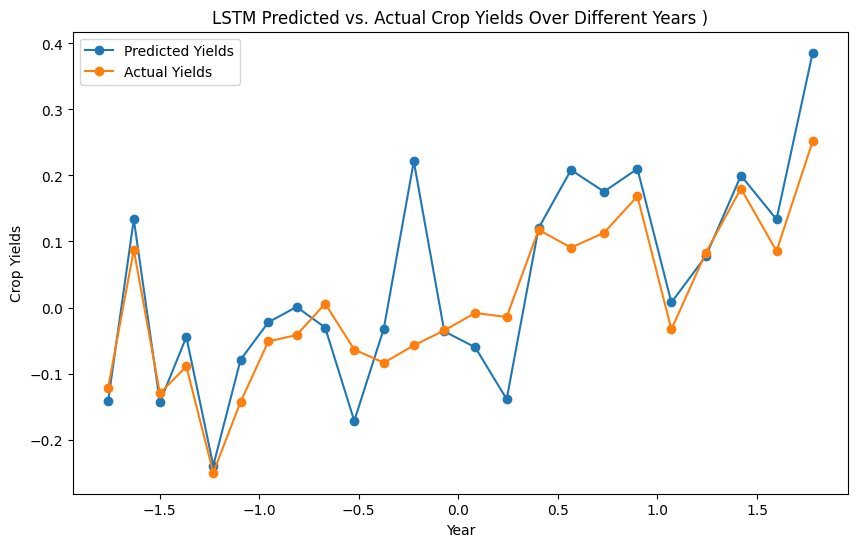

In [213]:
# Create a DataFrame with actual and predicted values
results_nn = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': lstm_predictions.ravel(),
                           'Year': X_test_reshaped['Crop_Year'].ravel()})
# Group by 'Year' and calculate the mean of actual and predicted values
grouped_results_nn = results_nn.groupby('Year').agg({
    'Actual': 'mean',
    'Predicted': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped_results_nn['Year'], grouped_results_nn['Predicted'],
         label='Predicted Yields', marker='o')
plt.plot(grouped_results_nn['Year'], grouped_results_nn['Actual'],
         label='Actual Yields', marker='o')
plt.xlabel('Year')
plt.ylabel('Crop Yields')
plt.title('LSTM Predicted vs. Actual Crop Yields Over Different Years )')
plt.legend()
plt.show()

In [158]:
crop_df = crop.copy()
crop_df = crop_df.drop(['Crop_Year','Pesticide', 'Crop', 'State', 'Season'], axis = 1)
crop_df.head()
numeric_features = crop_df.select_dtypes(include=['int', 'float']).columns
categorical_features = crop_df.select_dtypes(include=['object']).columns


# Create a copy of the original data for comparison
original_crop = crop_df.copy()

# missing values
original_crop = original_crop.dropna()

# outliers
for feature in numeric_features:
    original_crop[feature] = winsorize(original_crop[feature], limits=[0.01, 0.01])

# get dummy variables
#crop_df = pd.get_dummies(original_crop, columns = categorical_features, drop_first=True)


# Splitting data into features (X) and target variable (y)
X = crop_df.drop('Yield', axis=1)
y = crop_df['Yield']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123)

# Fit the scaler on the training set and transform both training and testing sets
# scaling
scaler = PowerTransformer(method = 'yeo-johnson')
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames and assign column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled_df, y_train)
rf_predictions = rf_model.predict(X_test_scaled_df)
# Evaluate models
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

# Calculate R²
rf_r2 = r2_score(y_test, rf_predictions)
# Print results
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest R²: {rf_r2}')


Random Forest RMSE: 277.4881197159174
Random Forest R²: 0.9123653009779606


In [93]:
#!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [92]:
#!jupyter nbconvert --to PDF /content/gdrive/MyDrive/Data_Product_Analytics_Pipeline.ipynb

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Data_Product_Analytics_Pipeline.ipynb to PDF
[NbConvertApp] Support files will be in Data_Product_Analytics_Pipeline_files/
[NbConvertApp] Making directory ./Data_Product_Analytics_Pipeline_files
[NbConvertApp] Making directory ./Data_Product_Analytics_Pipeline_files
[NbConvertApp] Making directory ./Data_Product_Analytics_Pipeline_files
[NbConvertApp] Making directory ./Data_Product_Analytics_Pipeline_files
[NbConvertApp] Making directory ./Data_Product_Analytics_Pipeline_files
[NbConvertApp] Making directory ./Data_Product_Analytics_Pipeline_files
[NbConvertApp] Making directory ./Data_Product_Analytics_Pipeline_files
[NbConvertApp] Making directory ./Data_Product_Analytics_Pipeline_files
[NbConvertApp] Making directory ./Data_Product_Analytics_Pipeline_files
[NbConvertApp] Making directory ./Data_Product_Analytics_Pipeline_files
[NbConvertApp] Making directory ./Data_Product_Analytics_Pipeline_files
[NbConvertApp] Making dir